<a href="https://colab.research.google.com/github/anshupandey/Generative-AI-for-Professionals/blob/main/langchain-course/03_LangChain_Chain_reflection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reflection


In the context of LLM agent building, reflection refers to the process of prompting an LLM to observe its past steps (along with potential observations from tools/the environment) to assess the quality of the chosen actions.
This is then used downstream for things like re-planning, search, or evaluation.

![Reflection](https://github.com/anshupandey/AI_Agents/blob/img/reflection.png?raw=1)

This notebook demonstrates a very simple form of reflection in LangGraph.

#### Prerequisites

We will be using a basic agent with a search tool here.

In [ ]:
!pip install -q -U langchain-core langchain-community langgraph langchain-openai
!pip install -q -U httpx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.3/366.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.6/983.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 1.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = 'YOUR_API_KEY'

## Generate

For our example, we will create a "5 paragraph essay" generator. First, create the generator:


In [ ]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an essay assistant tasked with writing excellent 5-paragraph essays."
            " Generate the best essay possible for the user's request."
            " If the user provides critique, respond with a revised version of your previous attempts.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)


chatmodel = ChatOpenAI(model="gpt-3.5-turbo",temperature=0.5)

generate = prompt | chatmodel

In [ ]:
essay = ""
request = HumanMessage(
    content="Write an essay on why the little prince is relevant in modern childhood"
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    essay += chunk.content

## The Enduring Relevance of the Little Prince in Modern Childhood

Antoine de Saint-Exupéry's "The Little Prince" is a timeless tale that continues to resonate with readers of all ages, particularly children. While the world has changed drastically since its publication in 1943, the story's themes of innocence, wonder, and the search for meaning remain profoundly relevant to the modern child navigating a complex and often overwhelming world. 

The Little Prince's journey across the cosmos, encountering diverse characters and unique planets, mirrors the child's own exploration of the world. Each encounter, from the conceited man to the lamplighter, represents a different facet of human nature and societal values. This exploration encourages children to question, observe, and develop their own understanding of the world around them. The story's simple yet profound language allows children to engage with complex ideas like love, loss, and the importance of connection, fostering their emo

In [ ]:
essay

'## The Enduring Relevance of the Little Prince in Modern Childhood\n\nAntoine de Saint-Exupéry\'s "The Little Prince" is a timeless tale that continues to resonate with readers of all ages, particularly children. While the world has changed drastically since its publication in 1943, the story\'s themes of innocence, wonder, and the search for meaning remain profoundly relevant to the modern child navigating a complex and often overwhelming world. \n\nThe Little Prince\'s journey across the cosmos, encountering diverse characters and unique planets, mirrors the child\'s own exploration of the world. Each encounter, from the conceited man'

### Reflect

In [ ]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a teacher grading an essay submission. Generate critique and recommendations for the user's submission."
            " Provide detailed recommendations, including requests for length, depth, style, etc.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
chatmodel = ChatOpenAI(model="gpt-3.5-turbo",temperature=0.5)
reflect = reflection_prompt | chatmodel

In [ ]:
reflection = ""
for chunk in reflect.stream({"messages": [HumanMessage(content=request.content + "\n" + essay)]}):
    print(chunk.content, end="")
    reflection += chunk.content

This is a good start to an essay on the relevance of "The Little Prince" to modern childhood. You've identified some key themes and provided examples to support your points. However, there are areas where you can expand and improve your analysis. 

Here are some specific recommendations:

**1. Expand on the "Modern Childhood" Context:**

* **Specificity:**  Instead of just mentioning "modern childhood," delve deeper into the specific challenges and pressures children face today.  For example, you could discuss the impact of social media, the pressure to succeed academically, or the constant exposure to technology. 
* **Contrast:**  Compare the challenges of modern childhood to the childhood depicted in the book. How does the story offer a different perspective or a sense of escape from these pressures?

**2. Develop Your Arguments with More Depth:**

* **Examples:**  While you mention the "conceited man" and the "lamplighter," you could provide more detailed analysis of how these chara

In [ ]:
reflection

'This is a good start to an essay on the relevance of "The Little Prince" to modern childhood. You\'ve identified some key themes and provided examples to support your points. However, there are areas where you can expand and improve your analysis. \n\nHere are some specific recommendations:\n\n**1. Expand on the "Modern Childhood" Context:**\n\n* **Specificity:**  Instead of just mentioning "modern childhood," delve deeper into the specific challenges and pressures children face today.  For example, you could discuss the impact of social media, the pressure to succeed academically, or the constant exposure to technology. \n* **Contrast:**  Compare the challenges of modern childhood to the childhood depicted in the book. How does the story offer a different perspective or a sense of escape from these pressures?\n\n**2. Develop Your Arguments with More Depth:**\n\n* **Examples:**  While you mention the "conceited man" and the "lamplighter," you could provide more detailed analysis of ho

### Repeat

And... that's all there is too it! You can repeat in a loop for a fixed number of steps, or use an LLM (or other check) to decide when the finished product is good enough.

In [ ]:
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=essay), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")

## The Little Prince: A Timeless Guide for Modern Childhood

Antoine de Saint-Exupéry's "The Little Prince" is a beloved classic that continues to resonate with readers of all ages, particularly children. While the world has changed drastically since its publication in 1943, the story's themes of innocence, wonder, and the search for meaning remain profoundly relevant to the modern child navigating a complex and often overwhelming world. 

Modern childhood is marked by a unique set of pressures and anxieties. Children today are bombarded with information and expectations from all sides. Social media platforms create a constant pressure to conform to unrealistic standards of beauty and success, while academic pressures and the relentless pursuit of achievement can leave children feeling overwhelmed and stressed. The constant exposure to technology, while offering opportunities for learning and connection, can also lead to isolation and a disconnect from the natural world. 

In contrast 

## Define graph

Now that we've shown each step in isolation, we can wire it up in a graph.

In [ ]:
from typing import List, Sequence

from langgraph.graph import END, MessageGraph, START
import time

async def generation_node(state: Sequence[BaseMessage]):
    return await generate.ainvoke({"messages": state})


async def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    time.sleep(30)
    # First message is the original user request. We hold it the same for all nodes
    translated =  [
        cls_map[msg.type](content=msg.content) for msg in messages[1:]
    ]
    res = await reflect.ainvoke({"messages": translated})
    # We treat the output of this as human feedback for the generator
    return HumanMessage(content=res.content)


builder = MessageGraph()
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_edge(START, "generate")


def should_continue(state: List[BaseMessage]):
    if len(state) > 6:
        # End after 3 iterations
        return END
    return "reflect"


builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
graph = builder.compile()

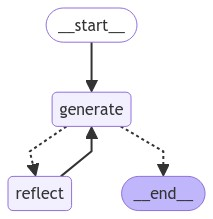

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
async for event in graph.astream(
    [
        HumanMessage(
            content="Generate an essay on the topicality of The Little Prince and its message in modern life"
        )
    ],
):
    ChatPromptTemplate.from_messages(event).pretty_print()
    print(list(event.values())[0].content)
    print("---")

================================ Human Message =================================

generate
## The Enduring Relevance of "The Little Prince": A Timeless Tale for Modern Times

Antoine de Saint-Exupéry's "The Little Prince," a seemingly simple children's story, transcends age and cultural boundaries, resonating with readers of all ages and backgrounds. Its enduring popularity lies in its timeless message, a poignant reflection on the human condition that remains profoundly relevant in our modern world. The story, through its whimsical narrative and profound insights, reminds us of the importance of imagination, empathy, and the search for meaning in a world often consumed by materialism and superficiality.

The Little Prince's journey across the cosmos, encountering diverse characters and their unique perspectives, serves as a powerful metaphor for the human search for understanding and connection. Each planet he visits represents a different facet of human nature, highlighting both the 

================================ Human Message =================================

reflect
This is a very strong essay! You've made excellent progress, and your analysis is now both insightful and engaging. Here's a breakdown of your strengths and a few minor suggestions for further refinement:

**Strengths:**

* **Clear and Focused Thesis:** You clearly state your argument about the book's enduring relevance to modern readers.
* **Strong Analysis:** You delve deeply into the themes of imagination, connection, and love/loss, providing insightful observations and connecting them to the modern world.
* **Specific Examples:** You use specific examples from the text to support your points, making your analysis more concrete and engaging.
* **Improved Structure:** The essay is well-organized, with clear topic sentences and transitions that connect your ideas smoothly.
* **Engaging Language:** You use vivid language and figurative language to bring the story to life, making your writing more 

In [ ]:
list(event.values())[0].content

'## The Enduring Relevance of "The Little Prince": A Timeless Tale for Modern Times\n\nAntoine de Saint-Exupéry\'s "The Little Prince," a seemingly simple children\'s story, transcends age and cultural boundaries, resonating with readers of all ages and backgrounds. Its enduring popularity lies in its timeless message, a poignant reflection on the human condition that remains profoundly relevant in our modern world. The story, through its whimsical narrative and profound insights, reminds us of the importance of imagination, empathy, and the search for meaning in a world often consumed by materialism and superficiality.\n\nThe Little Prince\'s journey across the cosmos, encountering diverse characters and their unique perspectives, serves as a powerful metaphor for the human search for understanding and connection. His encounters with the king, the conceited man, and the businessman highlight the dangers of egotism, vanity, and the pursuit of material wealth at the expense of genuine h

## Conclusion

Now that you've applied reflection to an LLM agent, I'll note one thing: self-reflection is inherently cyclic: it is much more effective if the reflection step has additional context or feedback (from tool observations, checks, etc.). If, like in the scenario above, the reflection step simply prompts the LLM to reflect on its output, it can still benefit the output quality (since the LLM then has multiple "shots" at getting a good output), but it's less guaranteed.
